# Insights into Forest Fires

## Loading libraries

In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import random

# importing sklearn libraries
from sklearn import neural_network, linear_model, preprocessing, svm, tree
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB

# importing keras libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

import warnings

# supressing the warning on the usage of Linear Regression model
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

Using TensorFlow backend.


## Working with the dataset

### Loading the dataset

The dataset can be downloaded from: https://www.kaggle.com/elikplim/forest-fires-data-set

The attributes in the dataset include:
1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: "jan" to "dec"
4. day - day of the week: "mon" to "sun"
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3
7. DC - DC index from the FWI system: 7.9 to 860.6
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40
12. rain - outside rain in mm/m2 : 0.0 to 6.4
13. area - the burned area of the forest (in ha): 0.00 to 1090.84

In [2]:
forest_fires = pd.read_csv('forest_fires.csv')
forest_fires

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.00
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.00
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.00
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.00
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.00


### Converting the labels under month and day to integers

In [3]:
forest_fires.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
forest_fires.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)

### Statistical analysis of dataset

In [4]:
forest_fires.describe()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,7.475822,4.259188,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,2.275990,2.072929,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,1.000000,1.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,7.000000,2.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,8.000000,5.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,9.000000,6.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,12.000000,7.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


### Corelation analysis for the dataset

In [5]:
forest_fires.corr()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000000,0.539548,-0.065003,-0.024922,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.063385
Y,0.539548,1.000000,-0.066292,-0.005453,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.044873
month,-0.065003,-0.066292,1.000000,-0.050837,0.291477,0.466645,0.868698,0.186597,0.368842,-0.095280,-0.086368,0.013438,0.056496
day,-0.024922,-0.005453,-0.050837,1.000000,-0.041068,0.062870,0.000105,0.032909,0.052190,0.092151,0.032478,-0.048340,0.023226
FFMC,-0.021039,-0.046308,0.291477,-0.041068,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,-0.048384,0.007782,0.466645,0.062870,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,-0.085916,-0.101178,0.868698,0.000105,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.006210,-0.024488,0.186597,0.032909,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,-0.051258,-0.024103,0.368842,0.052190,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,0.085223,0.062221,-0.095280,0.092151,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519


### Extracting features from the dataset

In [6]:
x_values = list(forest_fires['X'])
y_values = list(forest_fires['Y'])

loc_values = []

for index in range(0, len(x_values)):
    temp_value = []

    temp_value.append(x_values[index])
    temp_value.append(y_values[index])
    loc_values.append(temp_value)

In [7]:
month_values = list(forest_fires['month'])
day_values = list(forest_fires['day'])

ffmc_values = list(forest_fires['FFMC'])
dmc_values = list(forest_fires['DMC'])
dc_values = list(forest_fires['DC'])
isi_values = list(forest_fires['ISI'])

temp_values = list(forest_fires['temp'])
rh_values = list(forest_fires['RH'])
wind_values = list(forest_fires['wind'])
rain_values = list(forest_fires['rain'])

area_values = list(forest_fires['area'])

In [8]:
attribute_list = []

for index in range(0, len(x_values)):
    temp_list = []
    
    temp_list.append(x_values[index])
    temp_list.append(y_values[index])
    
    temp_list.append(month_values[index])
    temp_list.append(day_values[index])

    temp_list.append(ffmc_values[index])
    temp_list.append(dmc_values[index])
    temp_list.append(dc_values[index])
    temp_list.append(isi_values[index])

    temp_list.append(temp_values[index])
    temp_list.append(rh_values[index])
    temp_list.append(wind_values[index])
    temp_list.append(rain_values[index])
    
    attribute_list.append(temp_list)

### Counting the instances of location points in dataset

In [9]:
def count_points(x_points, y_points, scaling_factor):
    count_array = []
    
    for index in range(0, len(x_points)):
        temp_value = [x_points[index], y_points[index]]
        count = 0
        
        for value in loc_values:
            if(temp_value == value):
                count = count + 1
        count_array.append(count * scaling_factor )

    return count_array

### Histogram plotting function for dataset

In [10]:
def histogram_plot(dataset, title):
    plt.figure(figsize=(8, 6))    
    
    ax = plt.subplot()    
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left() 
    
    plt.title(title, fontsize = 22)
    plt.hist(dataset, edgecolor='black', linewidth=1.2)

### Scatter plot for the locations

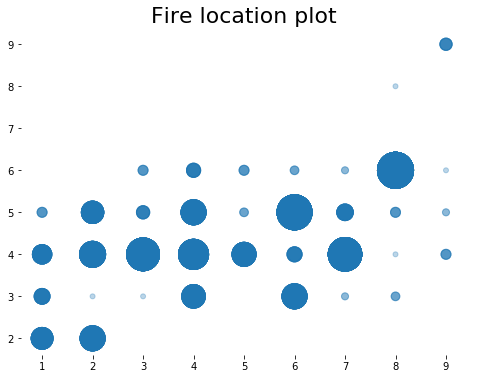

In [11]:
plt.figure(figsize=(8, 6))    
    
ax = plt.subplot()    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)
    
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left() 
    
plt.title("Fire location plot", fontsize = 22)
plt.scatter(x_values, y_values, s = count_points(x_values, y_values, 25), alpha = 0.3)
plt.show()

### Plotting the distribution of values for the dataset

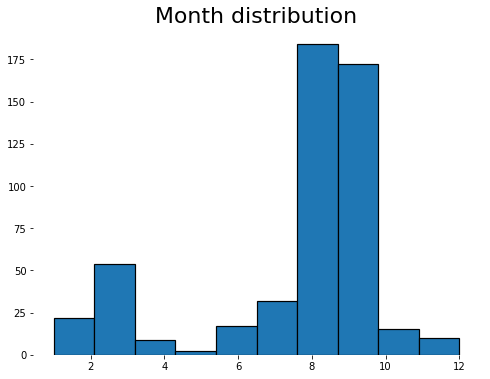

In [12]:
histogram_plot(month_values, title = "Month distribution")
plt.show()

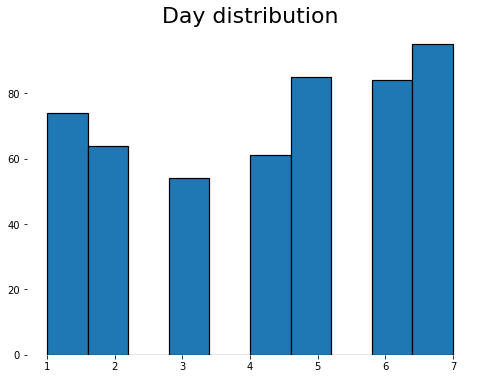

In [13]:
histogram_plot(day_values, title = "Day distribution")
plt.show()

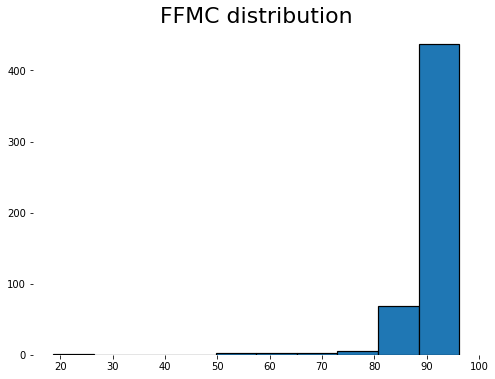

In [14]:
histogram_plot(ffmc_values, title = "FFMC distribution")
plt.show()

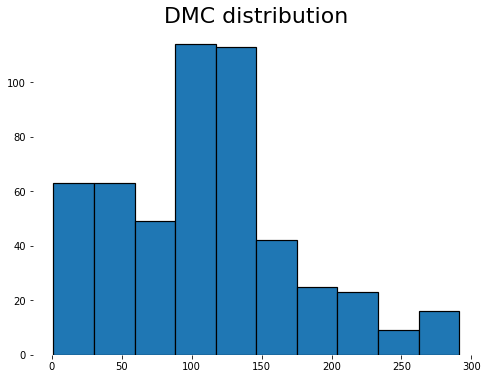

In [15]:
histogram_plot(dmc_values, title = "DMC distribution")
plt.show()

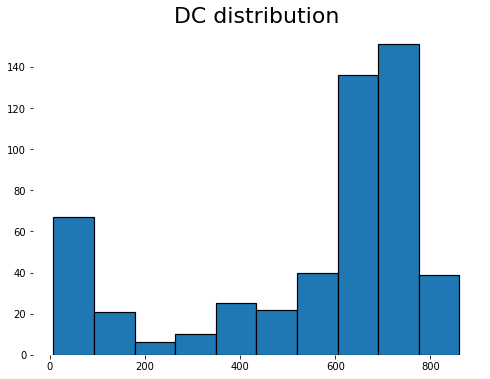

In [16]:
histogram_plot(dc_values, title = "DC distribution")
plt.show()

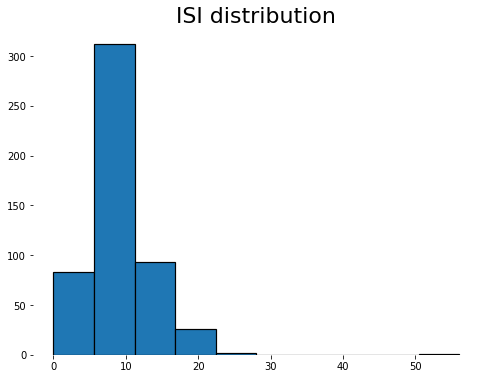

In [17]:
histogram_plot(isi_values, title = "ISI distribution")
plt.show()

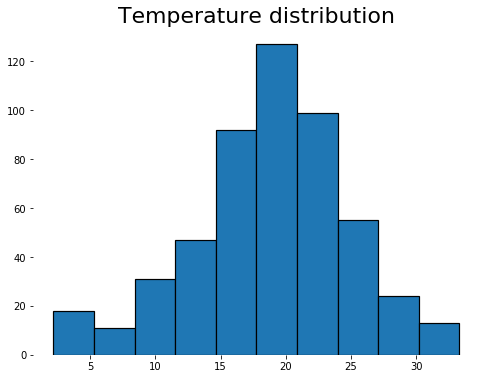

In [18]:
histogram_plot(temp_values, title = "Temperature distribution")
plt.show()

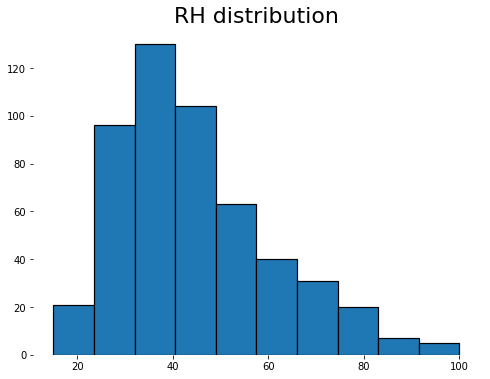

In [19]:
histogram_plot(rh_values, title = "RH distribution")
plt.show()

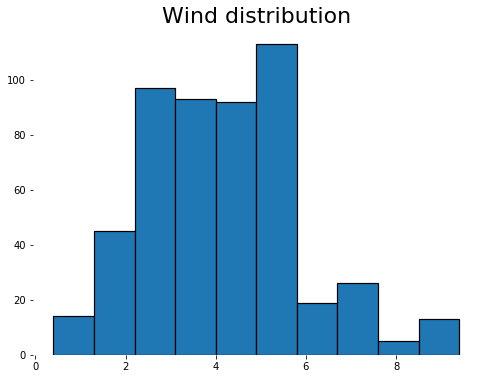

In [20]:
histogram_plot(wind_values, title = "Wind distribution")
plt.show()

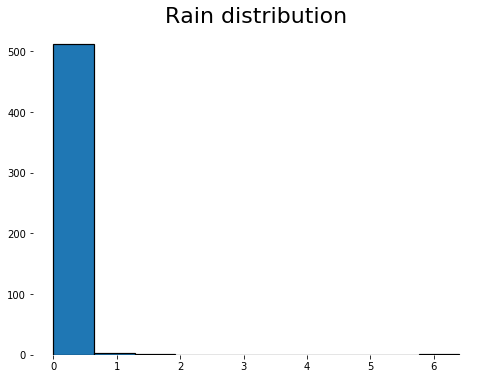

In [21]:
histogram_plot(rain_values, title = "Rain distribution")
plt.show()

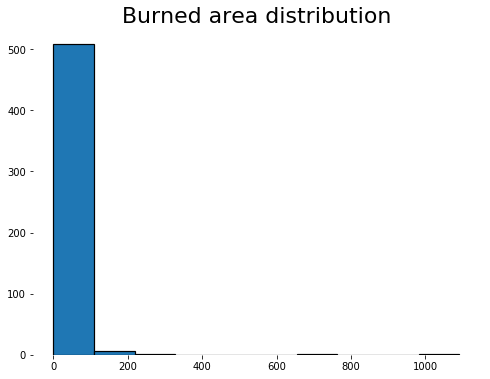

In [22]:
histogram_plot(area_values, title = "Burned area distribution")
plt.show()

### Percentage of dataset with 'burned area' > 0

In [23]:
total_count = 0
positive_data_count = 0

for value in area_values:
    if(value > 0):
        positive_data_count = positive_data_count + 1
    total_count = total_count + 1

print("The number of data records with 'burned area' > 0 are " + str(positive_data_count) + " and the total number of records are " + str(total_count) + ".")
print("The percentage value is " + str(positive_data_count/total_count * 100) + ".")

The number of data records with 'burned area' > 0 are 270 and the total number of records are 517.
The percentage value is 52.22437137330754.


## Gaining insights with learning models

### Spilliting the available data/Setting the initial parameters

In [24]:
train_x, test_x, train_y, test_y = train_test_split(attribute_list, area_values, test_size=0.3, random_state = 9)
mse_values = []
variance_score = []

### Printing the actual vs predicted values

In [25]:
def print_values(test, predicted):
    print("The actual output and the predicted output are:")
    
    for value in range(0, len(predicted_y)):
        print('%.4f' % test_y[value], " ", '%.4f' % predicted_y[value])

### Linear regression model

In [26]:
linear_regression = linear_model.LinearRegression()

linear_regression.fit(train_x, train_y)
predicted_y = linear_regression.predict(test_x)

print('Coefficients: \n', linear_regression.coef_)

print("\nMean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))

mse_values.append(mean_squared_error(test_y, predicted_y))
variance_score.append(r2_score(test_y, predicted_y))

#print_values(test_y, predicted_y)

Coefficients: 
 [ 1.71747529  2.62534697  1.19534284  1.42643221 -0.2411676   0.08588672
 -0.01211609 -0.35961031  0.62442967 -0.44664769  1.74511285 -1.58498463]

Mean squared error:  1913.2639647759795
Variance score: -0.04


### Decision tree model

In [27]:
decision_tree = tree.DecisionTreeRegressor(presort = True)

decision_tree.fit(train_x, train_y)
predicted_y = decision_tree.predict(test_x)

print("Mean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))

mse_values.append(mean_squared_error(test_y, predicted_y))
variance_score.append(r2_score(test_y, predicted_y))

#print_values(test_y, predicted_y)

Mean squared error:  2196.0115666666666
Variance score: -0.20


### MLP model

In [28]:
mlp = neural_network.MLPRegressor(hidden_layer_sizes = (150,50,50), activation = "tanh", solver = "sgd", learning_rate = "adaptive")

mlp.fit(train_x, train_y)
predicted_y = mlp.predict(test_x)

print("Mean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))

mse_values.append(mean_squared_error(test_y, predicted_y))
variance_score.append(r2_score(test_y, predicted_y))

#print_values(test_y, predicted_y)

Mean squared error:  1823.7495125172125
Variance score: 0.00


### SVM model

In [29]:
svm_model = svm.SVR()

svm_model.fit(train_x, train_y)
predicted_y = svm_model.predict(test_x)

print("Mean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))

mse_values.append(mean_squared_error(test_y, predicted_y))
variance_score.append(r2_score(test_y, predicted_y))

#print_values(test_y, predicted_y)

Mean squared error:  2039.790466031507
Variance score: -0.11


### Random forest model

In [30]:
random_forest = RandomForestRegressor()
random_forest.fit(train_x, train_y)
predicted_y = random_forest.predict(test_x)

print("Mean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))

mse_values.append(mean_squared_error(test_y, predicted_y))
variance_score.append(r2_score(test_y, predicted_y))

#print_values(test_y, predicted_y)

Mean squared error:  2176.650279763677
Variance score: -0.19


### Bayesian ridge model

In [31]:
bayesian_ridge = linear_model.BayesianRidge()
bayesian_ridge.fit(train_x, train_y)
predicted_y = bayesian_ridge.predict(test_x)

print("Mean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))

mse_values.append(mean_squared_error(test_y, predicted_y))
variance_score.append(r2_score(test_y, predicted_y))

#print_values(test_y, predicted_y)

Mean squared error:  1841.121419981122
Variance score: -0.01


### Lasso model

In [32]:
lasso_model = linear_model.Lasso()
lasso_model.fit(train_x, train_y)
predicted_y = lasso_model.predict(test_x)

print("Mean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))

mse_values.append(mean_squared_error(test_y, predicted_y))
variance_score.append(r2_score(test_y, predicted_y))

#print_values(test_y, predicted_y)

Mean squared error:  1904.404987844156
Variance score: -0.04


### Function for generating the graph

In [33]:
def generate_plot(title, ticks, dataset, color_number):
    colors = ["slateblue", "mediumseagreen", "tomato"]
    plt.figure(figsize=(8, 6))
    
    ax = plt.subplot()    
    ax.spines["top"].set_visible(False)   
    ax.spines["bottom"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left() 
    
    plt.xticks(np.arange(len(ticks)), ticks, fontsize=10, rotation=30)
    plt.title(title, fontsize = 22)
    plt.bar(ticks, dataset, linewidth=1.2, color=colors[color_number])

### Mean squared error graph

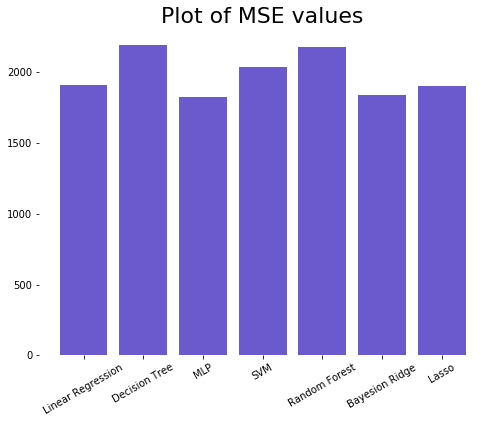

In [34]:
ticks = ["Linear Regression", "Decision Tree", "MLP", "SVM", "Random Forest", "Bayesion Ridge", "Lasso"]
generate_plot("Plot of MSE values", ticks, mse_values, 0)

### Variance score graph

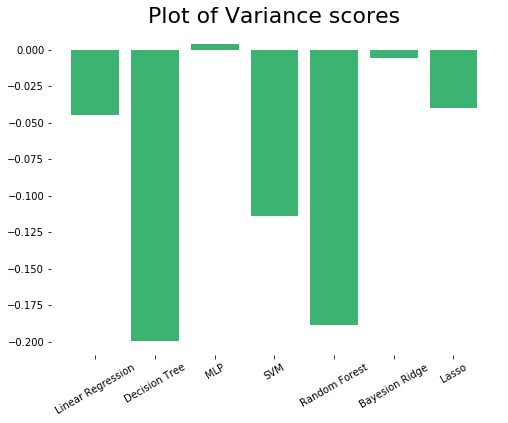

In [35]:
generate_plot("Plot of Variance scores", ticks, variance_score, 1)

## Applying Log-Transformation to the 'burned area' variable

We can see that the errors in the prediction of burned areas from the given dataset is very high in the above mentioned model. A reason for this could be the high skewness of the 'Burned Area' variable is towards zero.

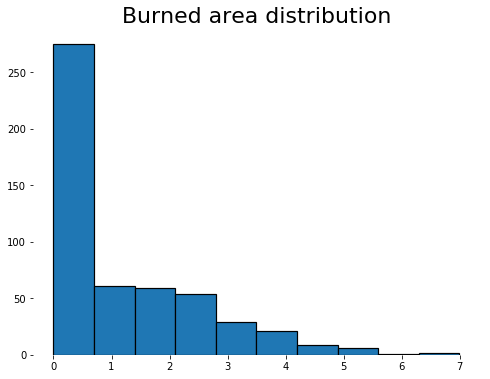

In [36]:
area_values = list(np.log(np.array(area_values) + 1))
histogram_plot(area_values, title = "Burned area distribution")

## Applying learning models on the processed data

### Setting the initial parameters

In [37]:
mse_values = []
variance_score = []

### Linear regression model

In [38]:
linear_regression = linear_model.LinearRegression()

linear_regression.fit(train_x, train_y)
predicted_y = linear_regression.predict(test_x)

print('Coefficients: \n', linear_regression.coef_)

print("\nMean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))

mse_values.append(mean_squared_error(test_y, predicted_y))
variance_score.append(r2_score(test_y, predicted_y))

#print_values(test_y, predicted_y)

Coefficients: 
 [ 1.71747529  2.62534697  1.19534284  1.42643221 -0.2411676   0.08588672
 -0.01211609 -0.35961031  0.62442967 -0.44664769  1.74511285 -1.58498463]

Mean squared error:  1913.2639647759795
Variance score: -0.04


### Decision tree model

In [39]:
decision_tree = tree.DecisionTreeRegressor(presort = True)

decision_tree.fit(train_x, train_y)
predicted_y = decision_tree.predict(test_x)

print("Mean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))

mse_values.append(mean_squared_error(test_y, predicted_y))
variance_score.append(r2_score(test_y, predicted_y))

#print_values(test_y, predicted_y)

Mean squared error:  2117.3019540064097
Variance score: -0.16


### MLP model

In [40]:
mlp = neural_network.MLPRegressor(hidden_layer_sizes = (150,30,50), activation = "tanh", solver = "sgd", learning_rate = "adaptive")

mlp.fit(train_x, train_y)
predicted_y = mlp.predict(test_x)

print("Mean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))

mse_values.append(mean_squared_error(test_y, predicted_y))
variance_score.append(r2_score(test_y, predicted_y))

#print_values(test_y, predicted_y)

Mean squared error:  1827.7749671997317
Variance score: 0.00


### SVM model

In [41]:
svm_model = svm.SVR()

svm_model.fit(train_x, train_y)
predicted_y = svm_model.predict(test_x)

print("Mean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))

mse_values.append(mean_squared_error(test_y, predicted_y))
variance_score.append(r2_score(test_y, predicted_y))

#print_values(test_y, predicted_y)

Mean squared error:  2039.790466031507
Variance score: -0.11


### Random forest model

In [42]:
random_forest = RandomForestRegressor()
random_forest.fit(train_x, train_y)
predicted_y = random_forest.predict(test_x)

print("Mean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))

mse_values.append(mean_squared_error(test_y, predicted_y))
variance_score.append(r2_score(test_y, predicted_y))

#print_values(test_y, predicted_y)

Mean squared error:  2347.1102954090097
Variance score: -0.28


### Bayesian ridge model

In [43]:
bayesian_ridge = linear_model.BayesianRidge()
bayesian_ridge.fit(train_x, train_y)
predicted_y = bayesian_ridge.predict(test_x)

print("Mean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))

mse_values.append(mean_squared_error(test_y, predicted_y))
variance_score.append(r2_score(test_y, predicted_y))

#print_values(test_y, predicted_y)

Mean squared error:  1841.121419981122
Variance score: -0.01


### Lasso model

In [44]:
lasso_model = linear_model.Lasso()
lasso_model.fit(train_x, train_y)
predicted_y = lasso_model.predict(test_x)

print("Mean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))

mse_values.append(mean_squared_error(test_y, predicted_y))
variance_score.append(r2_score(test_y, predicted_y))

#print_values(test_y, predicted_y)

Mean squared error:  1904.404987844156
Variance score: -0.04


### Mean squared error graph

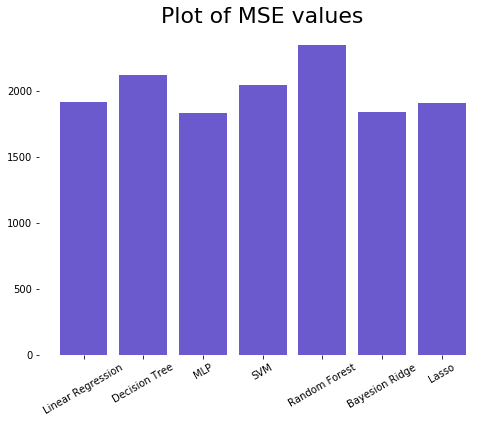

In [45]:
ticks = ["Linear Regression", "Decision Tree", "MLP", "SVM", "Random Forest", "Bayesion Ridge", "Lasso"]
generate_plot("Plot of MSE values", ticks, mse_values, 0)

### Variance score graph

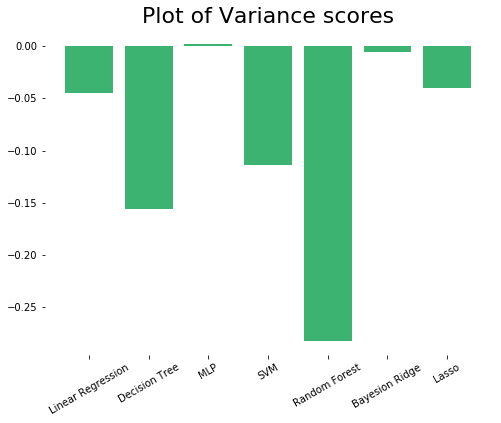

In [46]:
generate_plot("Plot of Variance scores", ticks, variance_score, 1)

## Normalisation of all data

In [47]:
n_x_values = preprocessing.normalize([x_values])[0]
n_y_values = preprocessing.normalize([y_values])[0]

n_month_values = preprocessing.normalize([month_values])[0]
n_day_values = preprocessing.normalize([day_values])[0]

n_ffmc_values = preprocessing.normalize([ffmc_values])[0]
n_dmc_values = preprocessing.normalize([dmc_values])[0]
n_dc_values = preprocessing.normalize([dc_values])[0]
n_isi_values = preprocessing.normalize([isi_values])[0]

n_temp_values = preprocessing.normalize([temp_values])[0]
n_rh_values = preprocessing.normalize([rh_values])[0]
n_wind_values = preprocessing.normalize([wind_values])[0]
n_rain_values = preprocessing.normalize([rain_values])[0]

n_area_values = preprocessing.normalize([area_values])[0]
n_attribute_list = []

for index in range(0, len(n_x_values)):
    temp_list = []
    
    temp_list.append(n_x_values[index])
    temp_list.append(n_y_values[index])
    
    temp_list.append(n_month_values[index])
    temp_list.append(n_day_values[index])

    temp_list.append(n_ffmc_values[index])
    temp_list.append(n_dmc_values[index])
    temp_list.append(n_dc_values[index])
    temp_list.append(n_isi_values[index])

    temp_list.append(n_temp_values[index])
    temp_list.append(n_rh_values[index])
    temp_list.append(n_wind_values[index])
    temp_list.append(n_rain_values[index])
    
    n_attribute_list.append(temp_list)

## Applying learning models on the normalised data

### Setting the initial parameters

In [48]:
mse_values = []
variance_score = []

### Spilliting the available data

In [49]:
train_x, test_x, train_y, test_y = train_test_split(n_attribute_list, n_area_values, test_size=0.3, random_state = 9)

### Linear regression model

In [50]:
linear_regression = linear_model.LinearRegression()

linear_regression.fit(train_x, train_y)
predicted_y = linear_regression.predict(test_x)

print('Coefficients: \n', linear_regression.coef_)

print("\nMean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))

mse_values.append(mean_squared_error(test_y, predicted_y))
variance_score.append(r2_score(test_y, predicted_y))

#print_values(test_y, predicted_y)

Coefficients: 
 [ 0.06062002  0.11191486  0.34063326  0.04497625  0.08314295  0.11997013
 -0.13438317 -0.12264177 -0.08720562 -0.30440979  0.16393813  0.02727977]

Mean squared error:  0.001426223498840591
Variance score: 0.00


### Decision tree model

In [51]:
decision_tree = tree.DecisionTreeRegressor(presort = True)

decision_tree.fit(train_x, train_y)
predicted_y = decision_tree.predict(test_x)

print("Mean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))

mse_values.append(mean_squared_error(test_y, predicted_y))
variance_score.append(r2_score(test_y, predicted_y))

#print_values(test_y, predicted_y)

Mean squared error:  0.002647224225674524
Variance score: -0.85


### MLP model

In [52]:
mlp = neural_network.MLPRegressor(hidden_layer_sizes = (150,50,50), activation = "tanh", solver = "sgd", learning_rate = "adaptive")

mlp.fit(train_x, train_y)
predicted_y = mlp.predict(test_x)

print("Mean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))

mse_values.append(mean_squared_error(test_y, predicted_y))
variance_score.append(r2_score(test_y, predicted_y))

#print_values(test_y, predicted_y)

Mean squared error:  0.003738326272192919
Variance score: -1.62


### SVM model

In [53]:
svm_model = svm.SVR()

svm_model.fit(train_x, train_y)
predicted_y = svm_model.predict(test_x)

print("Mean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))

mse_values.append(mean_squared_error(test_y, predicted_y))
variance_score.append(r2_score(test_y, predicted_y))

#print_values(test_y, predicted_y)

Mean squared error:  0.004579753060572858
Variance score: -2.20


### Random forest model

In [54]:
random_forest = RandomForestRegressor()
random_forest.fit(train_x, train_y)
predicted_y = random_forest.predict(test_x)

print("Mean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))

mse_values.append(mean_squared_error(test_y, predicted_y))
variance_score.append(r2_score(test_y, predicted_y))

#print_values(test_y, predicted_y)

Mean squared error:  0.001733191110990846
Variance score: -0.21


### Bayesian ridge model

In [55]:
bayesian_ridge = linear_model.BayesianRidge()
bayesian_ridge.fit(train_x, train_y)
predicted_y = bayesian_ridge.predict(test_x)

print("Mean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))

mse_values.append(mean_squared_error(test_y, predicted_y))
variance_score.append(r2_score(test_y, predicted_y))

#print_values(test_y, predicted_y)

Mean squared error:  0.0014432961907057092
Variance score: -0.01


### Lasso model

In [56]:
lasso_model = linear_model.Lasso()
lasso_model.fit(train_x, train_y)
predicted_y = lasso_model.predict(test_x)

print("Mean squared error: ", mean_squared_error(test_y, predicted_y))
print('Variance score: %.2f' % r2_score(test_y, predicted_y))

mse_values.append(mean_squared_error(test_y, predicted_y))
variance_score.append(r2_score(test_y, predicted_y))

#print_values(test_y, predicted_y)

Mean squared error:  0.0014437638154593492
Variance score: -0.01


## Visualising the results

### Mean squared error graph

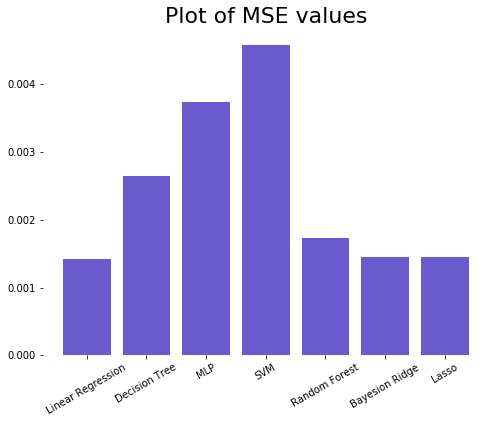

In [57]:
ticks = ["Linear Regression", "Decision Tree", "MLP", "SVM", "Random Forest", "Bayesion Ridge", "Lasso"]
generate_plot("Plot of MSE values", ticks, mse_values, 0)

### Variance score graph

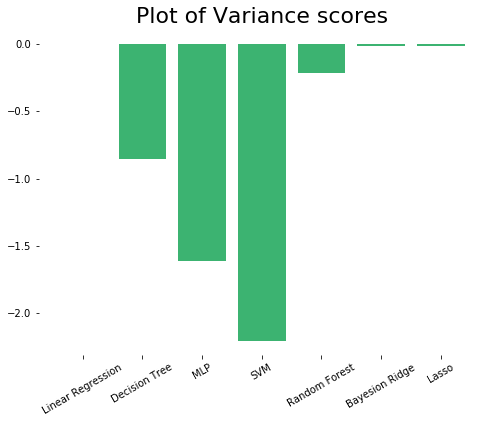

In [58]:
generate_plot("Plot of Variance scores", ticks, variance_score, 1)

The next step is to try out binary classification for this problem.

## Converting the target values to binary classes

In [59]:
binary_area_values = []
count = 0

for value in area_values:
    if(value == 0):
        binary_area_values.append(0)
    else:
        binary_area_values.append(1)

## Gaining insights with classification algorithm

### Setting the initial parameters

In [60]:
accuracy_values = []

### Spilliting the available data

In [61]:
train_x, test_x, train_y, test_y = train_test_split(attribute_list, binary_area_values, test_size=0.15, random_state = 4)

### SGD model

In [62]:
sgd = linear_model.SGDClassifier()
sgd.fit(train_x, train_y)
predicted_y = sgd.predict(test_x)

print("The predicted values are:", predicted_y)
print("The accuracy score is " + str(accuracy_score(test_y, predicted_y) * 100) + ".")

accuracy_values.append(accuracy_score(test_y, predicted_y) * 100)

The predicted values are: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]
The accuracy score is 51.28205128205128.


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


### Decision tree model

In [63]:
decision_tree = tree.DecisionTreeClassifier()
decision_tree.fit(train_x, train_y)
predicted_y = decision_tree.predict(test_x)

print("The predicted values are:", predicted_y)
print("The accuracy score is " + str(accuracy_score(test_y, predicted_y) * 100) + ".")

accuracy_values.append(accuracy_score(test_y, predicted_y) * 100)

The predicted values are: [1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 1 1 1 1
 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 0 0 0 0 1 1 1 1 0 1 1
 1 0 0 1]
The accuracy score is 66.66666666666666.


### Naive bayes model

In [64]:
naive_bayes = GaussianNB()
naive_bayes.fit(train_x, train_y)
predicted_y = naive_bayes.predict(test_x)

print("The predicted values are:", predicted_y)
print("The accuracy score is " + str(accuracy_score(test_y, predicted_y) * 100) + ".")

accuracy_values.append(accuracy_score(test_y, predicted_y) * 100)

The predicted values are: [1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1
 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1
 1 0 0 0]
The accuracy score is 55.12820512820513.


### SVM model

In [65]:
svm_model = svm.SVC(kernel='linear', gamma=100)
svm_model.fit(train_x, train_y)
predicted_y = svm_model.predict(test_x)

print("The predicted values are:", predicted_y)
print("The accuracy score is " + str(accuracy_score(test_y, predicted_y) * 100) + ".")

accuracy_values.append(accuracy_score(test_y, predicted_y) * 100)

The predicted values are: [1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]
The accuracy score is 58.97435897435898.


### Random forest model

In [66]:
random_forest = RandomForestClassifier()
random_forest.fit(train_x, train_y)
predicted_y = random_forest.predict(test_x)

print("The predicted values are:", predicted_y)
print("The accuracy score is " + str(accuracy_score(test_y, predicted_y) * 100) + ".")

accuracy_values.append(accuracy_score(test_y, predicted_y) * 100)

The predicted values are: [1 0 0 1 0 1 1 1 1 1 0 1 0 0 1 1 0 1 0 0 1 0 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1
 1 1 1 0 1 1 0 0 1 1 0 1 1 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 1 0 1 1 0 1 0 0 1
 1 0 0 1]
The accuracy score is 55.12820512820513.


## Visualising the results

### Variance score graph

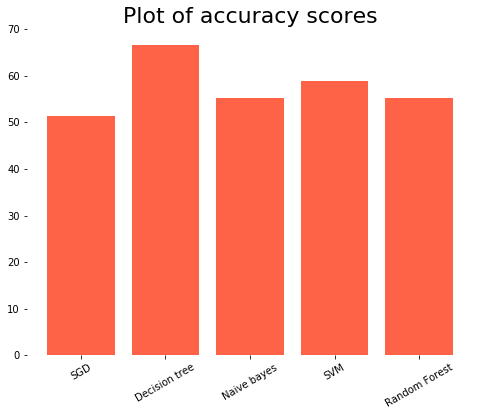

In [67]:
ticks = ["SGD", "Decision tree", "Naive bayes", "SVM", "Random Forest"]
generate_plot("Plot of accuracy scores", ticks, accuracy_values, 2)

## Artificial Neural Network - Implementation

In [68]:
train_x_a = np.array(train_x)
test_x_a = np.array(test_x)
test_y_a = np.array(test_y)
train_y_temp = np.array(train_y)

train_y_cl = []
for i in range(len(train_y)):
    if(train_y[i]>0):
        train_y_cl.append(1)
    else:
        train_y_cl.append(0)
train_y_cl = np.array(train_y_cl)

print("Length of Training data is : "+str(len(train_x_a))+" and Test data is : " + str(len(test_x_a)))

Length of Training data is : 439 and Test data is : 78


### Creating the Keras neural network model

In [69]:
model = Sequential()
model.add(Dense(12, activation='tanh',input_shape=(12,)))
model.add(Dense(12, activation='tanh',input_shape=(12,)))
model.add(Dense(1, activation='sigmoid'))

### Training, Fitting and Evaluating the model

In [70]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(train_x_a,train_y_cl, epochs=100, batch_size=10)

# Evaluate the model
scores = model.evaluate(test_x_a, test_y_a)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/100
439/439 [==============================] - 0s 667us/step - loss: 0.7567 - acc: 0.4920
Epoch 2/100
439/439 [==============================] - 0s 192us/step - loss: 0.6890 - acc: 0.5239
Epoch 3/100
439/439 [==============================] - 0s 202us/step - loss: 0.6850 - acc: 0.5649
Epoch 4/100
439/439 [==============================] - 0s 199us/step - loss: 0.6841 - acc: 0.5604
Epoch 5/100
439/439 [==============================] - 0s 194us/step - loss: 0.6821 - acc: 0.5649
Epoch 6/100
439/439 [==============================] - 0s 193us/step - loss: 0.6829 - acc: 0.5649
Epoch 7/100
439/439 [==============================] - 0s 195us/step - loss: 0.6812 - acc: 0.5649
Epoch 8/100
439/439 [==============================] - 0s 197us/step - loss: 0.6789 - acc: 0.5786
Epoch 9/100
439/439 [==============================] - 0s 192us/step - loss: 0.6795 - acc: 0.5763
Epoch 10/100
439/439 [==============================] - 0s 197us/step - loss: 0.6781 - acc: 0.5581
Epoch 11/100
439/43

439/439 [==============================] - 0s 209us/step - loss: 0.6416 - acc: 0.5831
Epoch 84/100
439/439 [==============================] - 0s 210us/step - loss: 0.6410 - acc: 0.5854
Epoch 85/100
439/439 [==============================] - 0s 211us/step - loss: 0.6447 - acc: 0.5945
Epoch 86/100
439/439 [==============================] - 0s 204us/step - loss: 0.6439 - acc: 0.5740
Epoch 87/100
439/439 [==============================] - 0s 210us/step - loss: 0.6404 - acc: 0.5854
Epoch 88/100
439/439 [==============================] - 0s 206us/step - loss: 0.6424 - acc: 0.5831
Epoch 89/100
439/439 [==============================] - 0s 211us/step - loss: 0.6433 - acc: 0.5831
Epoch 90/100
439/439 [==============================] - 0s 207us/step - loss: 0.6400 - acc: 0.5923
Epoch 91/100
439/439 [==============================] - 0s 225us/step - loss: 0.6439 - acc: 0.6150
Epoch 92/100
439/439 [==============================] - 0s 227us/step - loss: 0.6400 - acc: 0.6150
Epoch 93/100
439/439 [=

## Artificial Neural Network - Regression Model

### Defining base model

In [71]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=12, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

### Creating sequntial model

In [72]:
model = Sequential()
model.add(Dense(12, input_dim=12, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

### Compiling & training the model

In [73]:
# compile model
model.compile(loss='mean_squared_error', optimizer='adam')

# train model
history = model.fit(np.array(train_x), np.array(train_y), epochs=150, batch_size=5, verbose=1)

Epoch 1/150
439/439 [==============================] - 0s 912us/step - loss: 1.0102
Epoch 2/150
439/439 [==============================] - 0s 341us/step - loss: 0.2700
Epoch 3/150
439/439 [==============================] - 0s 329us/step - loss: 0.2690
Epoch 4/150
439/439 [==============================] - 0s 319us/step - loss: 0.2833
Epoch 5/150
439/439 [==============================] - 0s 331us/step - loss: 0.2643
Epoch 6/150
439/439 [==============================] - 0s 333us/step - loss: 0.2702
Epoch 7/150
439/439 [==============================] - 0s 329us/step - loss: 0.2699
Epoch 8/150
439/439 [==============================] - 0s 324us/step - loss: 0.2696
Epoch 9/150
439/439 [==============================] - 0s 322us/step - loss: 0.2915
Epoch 10/150
439/439 [==============================] - 0s 308us/step - loss: 0.2795
Epoch 11/150
439/439 [==============================] - 0s 309us/step - loss: 0.2660
Epoch 12/150
439/439 [==============================] - 0s 307us/step - lo

439/439 [==============================] - 0s 315us/step - loss: 0.2431
Epoch 98/150
439/439 [==============================] - 0s 299us/step - loss: 0.2398
Epoch 99/150
439/439 [==============================] - 0s 294us/step - loss: 0.2352
Epoch 100/150
439/439 [==============================] - 0s 300us/step - loss: 0.2394
Epoch 101/150
439/439 [==============================] - 0s 301us/step - loss: 0.2354
Epoch 102/150
439/439 [==============================] - 0s 298us/step - loss: 0.2405
Epoch 103/150
439/439 [==============================] - 0s 305us/step - loss: 0.2356
Epoch 104/150
439/439 [==============================] - 0s 299us/step - loss: 0.2397
Epoch 105/150
439/439 [==============================] - 0s 300us/step - loss: 0.2332
Epoch 106/150
439/439 [==============================] - 0s 302us/step - loss: 0.2358
Epoch 107/150
439/439 [==============================] - 0s 300us/step - loss: 0.2398
Epoch 108/150
439/439 [==============================] - 0s 298us/step

### Make Predictions

In [74]:
predicted = model.predict( np.array(test_x),batch_size=None, verbose=0, steps=1)

### Evaluate model with standardized dataset

In [75]:
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=100, batch_size=5, verbose=1)

In [76]:
seed = 12
np.random.seed(seed)

### Model Validation - 10 fold validation

In [77]:
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(estimator, np.array(test_x), np.array(test_y), cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Epoch 1/1
8/8 [==============================] - 0s 5ms/step
Epoch 1/1
8/8 [==============================] - 0s 6ms/step
Epoch 1/1
8/8 [==============================] - 0s 8ms/step
Epoch 1/1
8/8 [==============================] - 0s 9ms/step
Epoch 1/1
8/8 [==============================] - 0s 11ms/step
Epoch 1/1
8/8 [==============================] - 0s 16ms/step
Epoch 1/1
8/8 [==============================] - 0s 13ms/step
Epoch 1/1
8/8 [==============================] - 0s 13ms/step
Epoch 1/1
7/7 [==============================] - 0s 17ms/step
Epoch 1/1
7/7 [==============================] - 0s 20ms/step
Results: -4.91 (9.22) MSE


### Checking the MSE and variance scores

In [78]:
print("Mean squared error: ", mean_squared_error(test_y, predicted))
print('Variance score: %.2f' % r2_score(test_y, predicted))

Mean squared error:  0.25552666820361547
Variance score: -0.02
